<a href="https://colab.research.google.com/github/Omolabak5/data-and-python/blob/main/Copy_of_P_01b_STEAM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini project to analyse purchase data from the STEAM platform



---



### Instructions

Each section will relate to a different part of the Data Life Cycle and will include instructions, then a separate text block for you to write your own comments about what you have done and why.

Add additional code and text blocks as required and delete the blocks titled 'Instructions' when you are finished.

Read this [Markdown Guide](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=Lhfnlq1Surtk) for examples of how to change the appearance of your text

Read this [article](https://medium.com/@nanaliu/a-seamless-guide-to-embedding-photos-into-google-colab-894167bfde3a) to learn how to insert images saved on your Google Drive into a Colab notebook.

IMPORTANT:

Before starting this project, you should have completed the following worksheets:

[05_Lists_and_loops.ipynb](https://colab.research.google.com/drive/1IK_7jaWs2WmWHFcumi_ViYWmL4rs7oyU?usp=drive_link)  
[06_Creating_new_lists_with_for_loops.ipynb](https://colab.research.google.com/drive/1RO2l8Ct-pACOqgZzvNebdVdPth7rwHMD?usp=drive_link)  
[15_Lists_Dictionaries_Challenges.ipynb](https://colab.research.google.com/drive/1Y27sQKWn0G7w-hCqKo2ffPNvKmFCiLl4?usp=drive_link)  
[16_Dictionary_steam_challenge.ipynb](https://colab.research.google.com/drive/1nZnP_SN5QFnQMOUIVKRsvqtUcbGiRTzs?usp=drive_link)  
[18_Opening_and_saving_files_locally_and_on_Google_Drive.ipynb
](https://colab.research.google.com/drive/1gd1_2Ha1ouRec5ueLre1L3W374PZKkf2?usp=drive_link)

These worksheets will help you to feel comfortable with some of the techniques you will use.

## Define the Problem



---



### Instructions


1.   Phrase a question you would like to answer.
2.   Provide some background on the topic including an explanation of any concepts that may not be obvious to a layperson.
3.   Explain why finding an answer to your question would be useful.








The STEAM games platform provides a subscription service for players and a platform for purchasing games.  Users on the STEAM platform often try out a game before purchasing but some just visit the site to purchase new games.  Each user has a unique ID.

STEAM publish various statistics, like the top games by number of online players, but there are interesting questions to ask about purchased games.

How many different games are purchased by each user and what is the average number of games per user?  

How many different users purchased each game which are the top 10 most popular games?

Knowing the answers to these questions, it will be possible to identify the most popular games and the most active users.  The plaform operators might start to offer rewards for high levels of activity on the platform, or discount offers for those who buy fewer games.

## Collect the Data


---

### Instructions

1. Decide and state what data you need to answer your question.
2. Explain where you will find this data or how you will collect it.
3. For each datasource you intend to use, create a new text block to describe the data and the fields it contains, show a link to the original dataset and any documentation associated with it.
4. Below each text block associated with a datasource, add a code block to import that dataset, either from the online source or your own Google Drive.
5. Make sure you've fully researched your data!



## Data collection

A file of data from the STEAM platform has already been collected.  It is not the most up to date but the data is quite specific for this problem and gives an insight into what could be done on an ongoing basis to have these types of insight regularly available.  It was originally collected from the STEAM site and is made available for you to use for this purpose.

File:  https://docs.google.com/spreadsheets/d/1jIla2fCpkdMYgh9rq0icScURjMravr7nUHFCXvV-rXE/edit?usp=drive_link

Make a copy of the data and explore (in Google sheets).  Save this copy on your Google Drive

## Clean and Transform


---



### Instructions

1. For each dataset, perform validation and cleaning on each column and give a written description of what you have done and why, particularly how you have decided to deal with missing values.
2. Extract new features from your dataset if applicable.
3. Perform any joining or merging of data you feel is applicable and explain why you have done this.
4. Reshape the data if necessary, and provide a written explanation of what you have done and why.
5. Filter out any data you definitely don't need for your analysis.
6. Save your transformed data for use in other software.


## Use Google sheets to create a clean copy of the data containing ONLY the purchased games records.


---  

### **Dataset Overview & Initial Exploration**  

To begin our analysis, we first **import the necessary packages**, load the dataset, and preview both the **first five** and **last five rows** to understand its structure.  

The dataset used in this analysis was sourced from the STEAM site and contains **detailed information about games, their users, and the actions taken**—whether the game was **purchased or played**.  

**Source:** File: https://docs.google.com/spreadsheets/d/1jIla2fCpkdMYgh9rq0icScURjMravr7nUHFCXvV-rXE/edit?usp=drive_link

**Fields Included:**  
- **Users** – Unique identifiers for each user.  
- **Games** – Titles of the games.  
- **Action** – Specifies whether the game was **played** or **purchased**.  

This dataset serves as the foundation for our analysis, allowing us to explore **user behaviour, and game popularity.**

In [31]:
import pandas as pd
from google.colab import drive

def mount_drive():
  drive.mount('/content/drive', force_remount=True)
  folderpath = "/content/drive/MyDrive/Colab_data"
  return folderpath

def get_data(path):
  try:
    df = pd.read_csv(path + "/steam-data.csv")
    return df
  except:
    print("There was a problem and the file could not be opened.")

# read the data from the file into the variable df, then display the data.  The data in df will be available in cells further down.
path = mount_drive()
steam_df = get_data(path)
display(steam_df)

Mounted at /content/drive


,users,games,action
0,151603712,The Elder Scrolls V Skyrim,purchase
1,151603712,The Elder Scrolls V Skyrim,play
2,151603712,Fallout 4,purchase
3,151603712,Fallout 4,play
4,151603712,Spore,purchase
...,...,...,...
199995,128470551,Titan Souls,play
199996,128470551,Grand Theft Auto Vice City,purchase
199997,128470551,Grand Theft Auto Vice City,play
199998,128470551,RUSH,purchase



### **Step One: Cleaning the Data**  

We begin by loading the dataset, **"steam-data.csv,"** which was uploaded to Google Drive, into a pandas DataFrame (`df`). The cleaning process involves several key steps to ensure data accuracy and relevance for our analysis.  

**Filtering Unnecessary Data** : remove all rows where the **action** column contains `"play"`, since our focus is on purchases.  

**Validating the Games Column** : check the **games** column to ensure it contains only valid game titles (i.e., no numeric values or corrupted entries). Any rows containing invalid game names will be filtered out.  

**Handling Missing Values**: scan the entire dataset for **null or missing values**. If any are found, the corresponding rows will be removed to maintain data integrity.  

**Dropping the Action Column**: After filtering, the **action** column becomes redundant, as only purchase-related data remains.  
We drop this column, leaving an updated dataset with just **users** and **games**, linking each user to their purchased games.  

**Saving the Cleaned Dataset** : Finally, the updated dataset is saved and downloaded for analysis.

In [2]:
import pandas as pd
from google.colab import files
df = pd.read_csv(path + "/steam-data.csv")

def clean_data(df):
  # Remove rows where 'action' column contains 'play'
  filtered_data = df[df["action"] != "play"]
  display(filtered_data.info())


  print("````````\n" * 5)  # Prints 5 rows for sepration

  # Check for numeric values in the "games" column
  numeric_games = filtered_data["games"].apply(lambda x: isinstance(x, (int, float)))
  # Display rows where "games" contains numbers
  print(filtered_data[numeric_games])



  print("````````\n" * 5)  # Prints 5 rows for sepration


  #check for null values accross the dataframe
  check_null = filtered_data.isnull().values.any()
  print(f"Does the dataframe contain null values? {check_null}")



  #drop the "action" column as is not needed for analysis
  filtered_data.drop(columns=["action"], inplace=True)

  print("````````\n" * 5)  # Prints 5 rows for sepration

  #Display the first few rows after filtering
  print("This is the cleaned steam data:")
  print(filtered_data.head(10))

  #Save the filtered dataset
  filtered_data.to_csv("updated-steam-data.csv", index=False)
  print("File saved successfully.")

  #to download the filtered data file
  #filtered_data.to_csv('updated-steam-data.csv', index=False)
  #files.download('updated-steam-data.csv')



clean_data(df)





<class 'pandas.core.frame.DataFrame'>
Index: 129511 entries, 0 to 199998
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   users   129511 non-null  int64 
 1   games   129511 non-null  object
 2   action  129511 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.0+ MB


None

````````
````````
````````
````````
````````

Empty DataFrame
Columns: [users, games, action]
Index: []
````````
````````
````````
````````
````````

Does the dataframe contain null values? False
````````
````````
````````
````````
````````

This is the cleaned steam data:
        users                       games
0   151603712  The Elder Scrolls V Skyrim
2   151603712                   Fallout 4
4   151603712                       Spore
6   151603712           Fallout New Vegas
8   151603712               Left 4 Dead 2
10  151603712                    HuniePop
12  151603712               Path of Exile
14  151603712                 Poly Bridge
16  151603712                 Left 4 Dead
18  151603712             Team Fortress 2


<ipython-input-2-503bb8966a4e>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(columns=["action"], inplace=True)


File saved successfully.


As long as the data is showing in a table with headings you can use the following to create two lists:

```
users = df["users"].tolist()
games = df["games"].tolist()
```



---
The updated steam data is new data frame , using the .`info()` and `display()`, it cotains two column : **users** and **games** with non null values of 129511 reduced from 200000.

---


In [4]:
import pandas as pd
df = pd.read_csv(path + "/updated-steam-data.csv")


#let's get to know our updated data
df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129511 entries, 0 to 129510
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   users   129511 non-null  int64 
 1   games   129511 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.0+ MB


,users,games
0,151603712,The Elder Scrolls V Skyrim
1,151603712,Fallout 4
2,151603712,Spore
3,151603712,Fallout New Vegas
4,151603712,Left 4 Dead 2
...,...,...
129506,128470551,Fallen Earth
129507,128470551,Magic Duels
129508,128470551,Titan Souls
129509,128470551,Grand Theft Auto Vice City


### **Step Two: Exploratory Data Analysis (EDA)**  

The analysis begins by creating a list of **unique users and their purchased games**. This list is then structured into a **dictionary**, where:  
Each **user number** serves as a key.  
The corresponding **value** is a list of games purchased by that user.  

This transformation is achieved using a **loop approach**, ensuring each user is accurately linked to their purchases. Finally, the results are printed using a `for` loop to provide a clear overview of the structured data.



In [35]:
import pandas as pd
df = pd.read_csv(path + "/updated-steam-data.csv")


#firstly, we create a list of unique users and games
unique_users = df["users"].unique()
unique_games = df["games"].unique()



# Create a dictionary mapping users to games
user_game_dict = {unique_users[i]: unique_games[i] for i in range(min(len(unique_users), len(unique_games)))}


# Print dictionary
for user, game in user_game_dict.items():
    print(f"{user} : {game}")

print(f"Total unique users: {len(unique_users)}")
print(f"Total unique games: {len(unique_games)}")


Streaming output truncated to the last 5000 lines.
145904806 : METAL GEAR RISING REVENGEANCE
164591420 : Starpoint Gemini 2
171982044 : The Vanishing of Ethan Carter
187533357 : Goat Simulator
94088853 : Mass Effect
48058475 : Arma 2 Operation Arrowhead
170095814 : METAL GEAR SOLID V GROUND ZEROES
212751581 : Banished
301883131 : DiRT Showdown
31887051 : Sonic Adventure 2 
116085629 : Battlestations Midway
106238372 : HOARD
217834203 : Sunless Sea
202395275 : Mark of the Ninja
248444377 : Creeper World 3 Arc Eternal
25941262 : Turbo Dismount
148510973 : Floating Point
64369759 : Grow Home
289893544 : LUFTRAUSERS
223471406 : Arma 2
223827574 : No Time To Explain Remastered
210778610 : FEZ
116407650 : Delver
125699277 : The Legend of Heroes Trails in the Sky
173857208 : Evoland
9823354 : Bleed
304467587 : Borderlands 2
165269326 : Race The Sun
226033921 : Shadowgrounds
232064401 : They Bleed Pixels
141593973 : Trine
174965596 : Sir, You Are Being Hunted
100519466 : Next Car Game Sneak Pe

## Analyse
---



Analyze the data to answer the project’s questions:


*  Calculate games and number of users purchases.


*  Calculate the number of games purchased per user.
*   Find the top 10 most popular games.

*  Calculate Statistics:
Find the average number of games purchased per user.








In [24]:
import pandas as pd
df = pd.read_csv(path + "/updated-steam-data.csv")

# games by number of users purchases
users_per_game = df.groupby("games")["users"].nunique()
print("**Games by the number of users purchases:")
print(users_per_game)

print("    \n" * 2)

#the popular (top 10) games
top_ten_games = users_per_game.sort_values(ascending=False).head(10)
print("**Top 10 most popular games:")
print(top_ten_games)

print("    \n" * 2)

#the least purchase games
least_purchased_games = users_per_game.sort_values(ascending=True).head(10)
print("**Top 10 least purchased games:")
print(least_purchased_games)




**Games by the number of users purchases:
games
007 Legends                                                     1
0RBITALIS                                                       3
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby)      7
10 Second Ninja                                                 6
10,000,000                                                      1
                                                             ... 
sZone-Online                                                  102
samurai_jazz                                                    1
the static speaks my name                                      13
theHunter                                                     248
theHunter Primal                                                4
Name: users, Length: 5155, dtype: int64
    
    

**Top 10 most popular games:
games
Dota 2                             4841
Team Fortress 2                    2323
Unturned                           1563
Counter-Strike Globa

From the output above, we can see a list of games along with the number of users who purchased each game. A deeper analysis reveals that the most popular games, those with the highest number of users, are predominantly **multiplayer-focused**, particularly within the shooter and action genres.

Looking at the least purchased games, These games span a mix of action, sports, simulation, adventure, puzzle, and role-playing genres.

In [30]:

#users by number of games each purchased
games_per_user = df.groupby("users")["games"].nunique()
print("**Games purchased per user:")
print(games_per_user)

print("  \n" * 2)

#average games purchased by user
average_games_per_user = round(games_per_user.mean(),2)
print(f"**Average games per user: {average_games_per_user}")

#find user with the highest purchase
highest_purchase = games_per_user.idxmax()
print(f"**User with the highest purchase: {highest_purchase}")


**Games purchased per user:
users
5250         21
76767        36
86540        82
103360       10
144736        8
             ..
309554670     1
309626088     1
309812026     2
309824202     1
309903146     1
Name: games, Length: 12393, dtype: int64
  
  

**Average games per user: 10.39
**User with the highest purchase: 62990992


The result above is a list of total games purchased by each unique users, with the average games purchased by each unique user 10.39, **approximately 10 games**.

The user with the largest purchase being , **user number: 62990992**

## Interpret and Visualise


---



### Instructions

1. Import the data into PowerBI.
2. Create a number of different visualisations that emphasise your findings.
3. For each visualisation, add a text box to explain what it shows.
4. Take screenshots of your work and add them in the text box.

## **Step Three : Data Visualisation.**


Figure One(1): A visualisation of users per game helps us understand user engagement, game popularity, and purchase distribution across different titles. By analyzing this metric, we can uncover key patterns in user behaviuor and game performance.



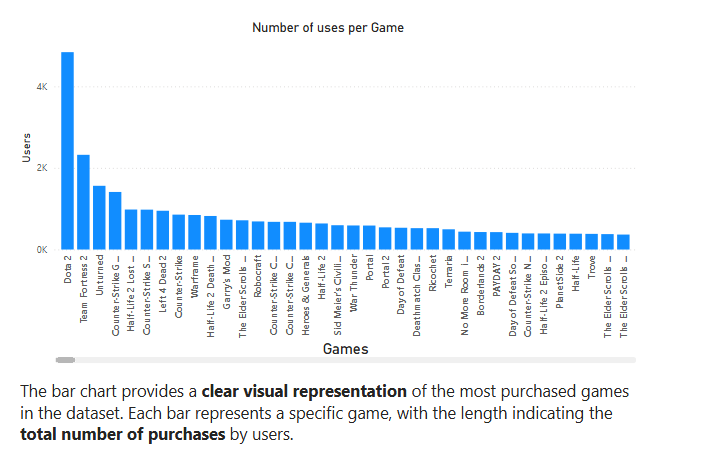



Figure two(2) : This is a bar chart of the Top 10 purchased Games.  visualisation of the top 10 purchased games provides valuable insights into game popularity, user preferences, and market trends. This analysis helps in understanding which games dominate user purchases and why.



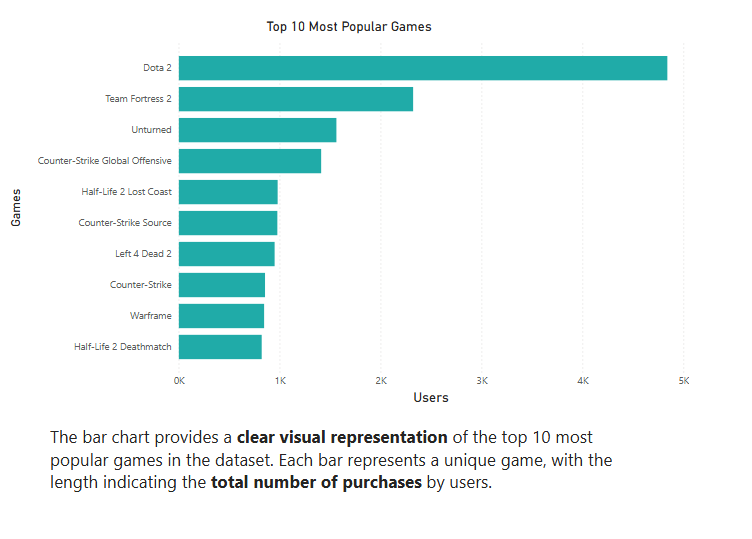



Figure Three(3): This visualization is particularly valuable for dynamic exploration, enabling deeper insights into user engagement and game sales performance.


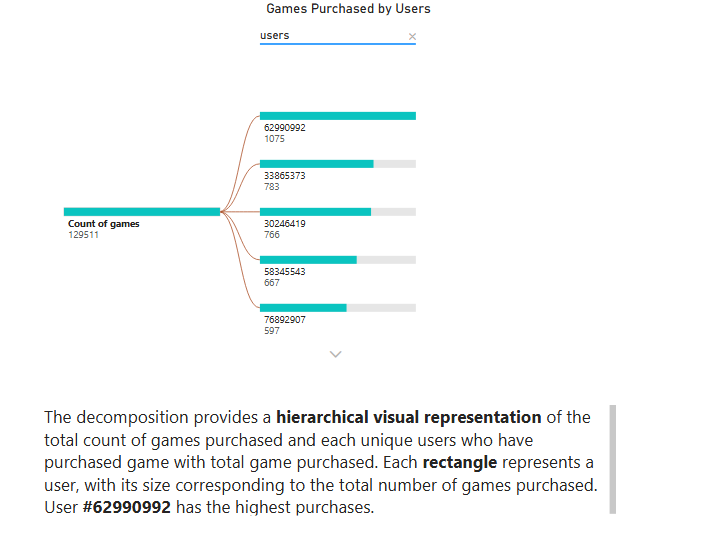


Figure 4 : Visualises the mean value of the numbers of games purchased by users. This represent the average counts of games each unique user purchased.


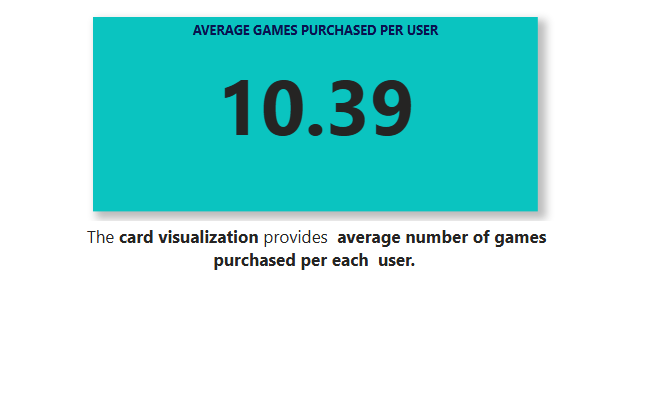

## Tell the Story



---



### Instructions

1. Combine your visualisations and text into a PowerBI report
2. Arrange your work so that it tells the story of your data and what conclusions you have drawn.
3. Add comments on what the next steps would be in terms of further analysis, if appropriate.
4. Write a summary of your report and share a link to it.


DOUBLE CLICK HERE TO WRITE YOUR COMMENTS AND ADD VISUALS

## Evaluate the Process


---



### Instructions

Evaluate each of the steps in your project answering any of the following questions that are relevant:

**1.What I was pleased with?**  
  
I was particularly pleased with my ability to  **clean and filter the dataset**. This ensured that the data was well-structured, free of inconsistencies, and optimized for analysis.  

I applied data analysis techniques like **NumPy and for-loop logic** to extract meaningful insights from the dataset. This allowed me to identify key takeaways that could drive strategic decision-making and business improvements.  

Beyond analysis, I was able to visually represent the insights using appropriate Power BI visualisations, making the findings more accessible.



**2.What did you find difficult?**

One of the key challenges was determining whether the exploratory data analysis performed was sufficient while staying within the defined project scope.

Aligning findings with real-world applications, and improving data storytelling to bridge the gap between analysis and business performance.


**3. What would you do differently?**

Rather than limiting the analysis solely to purchased games, I would incorporate games that were played but not purchased. This would enable a deeper analysis of conversion rates, helping to understand how gameplay influences purchasing decisions.

Incorporating game rankings based reviews, or user's ratings would help identify whether top-ranked games translate to higher purchases or if other factors, such as pricing and promotions, play a significant role.


**4. What have you learnt?**
I learned how to clean, filter, and analyze data to extract meaningful insights, ensuring accuracy and relevance for decision-making. Creating Power BI visualisations enhanced my ability to effectively communicate findings through data storytelling.


DOUBLE CLICK HERE TO WRITE YOUR COMMENTS